In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supply-chain-shipment-pricing-data/SCMS_Delivery_History_Dataset.csv


In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import plotly.graph_objs as go
import plotly.offline as py
warnings.filterwarnings("ignore")

In [3]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18

In [4]:
# reading dataset
df = pd.read_csv("/kaggle/input/supply-chain-shipment-pricing-data/SCMS_Delivery_History_Dataset.csv")

In [5]:
#check first five rows of the dataset
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [6]:
#check last five rows of the dataset
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [7]:
#check shape
print(f"Total No of Rows: {df.shape[0]} and Columns: {df.shape[1]}")

Total No of Rows: 10324 and Columns: 33


In [8]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [9]:
# total no of unique values in each columns
df.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [10]:
# checking for null values
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [11]:
#null values in %ages
df.isnull().mean()*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

<AxesSubplot:>

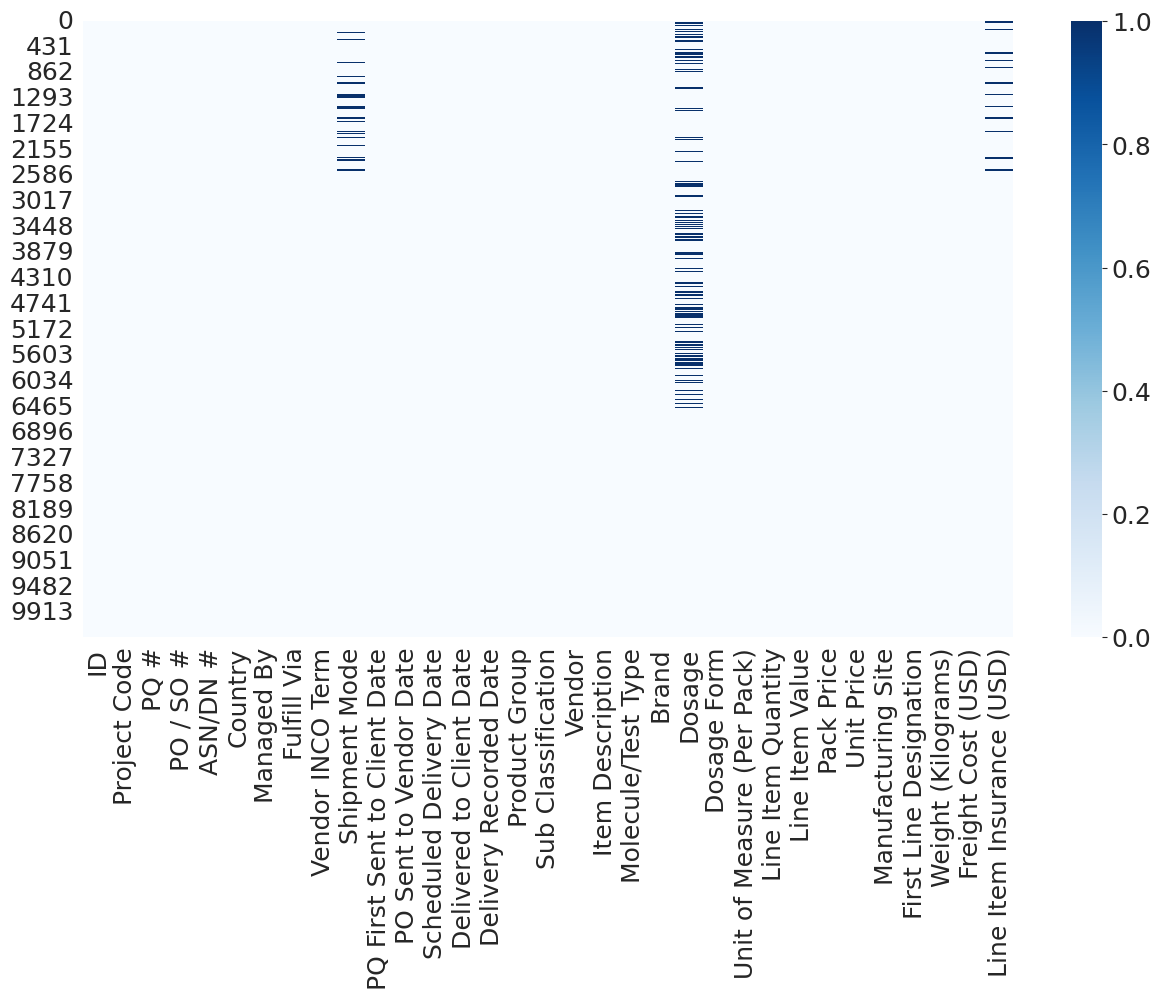

In [12]:
# heatmap for null values
sns.heatmap(df.isnull(), cmap ="Blues")

In [13]:
# chexking duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10319    False
10320    False
10321    False
10322    False
10323    False
Length: 10324, dtype: bool

In [14]:
# chexking duplicated values
df.duplicated().sum()

0

In [15]:
# statasic analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [16]:
df.describe(include=object).T

,count,unique,top,freq
Project Code,10324,142,116-ZA-T30,768
PQ #,10324,1237,Pre-PQ Process,2681
PO / SO #,10324,6233,SCMS-199289,67
ASN/DN #,10324,7030,ASN-19166,54
Country,10324,43,South Africa,1406
Managed By,10324,4,PMO - US,10265
Fulfill Via,10324,2,From RDC,5404
Vendor INCO Term,10324,8,N/A - From RDC,5404
Shipment Mode,9964,4,Air,6113
PQ First Sent to Client Date,10324,765,Pre-PQ Process,2476


In [17]:
# Dictionaries with ID as keys and weight/freight as values
id_weight = dict(zip(df['ID'],df['Weight (Kilograms)']))
id_freight = dict(zip(df['ID'],df['Freight Cost (USD)']))

In [18]:
# Functions to get weight and freight from corresponding ID numbers
def get_weight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_weight.get(int(e))
        except:
            return (data)
    else:
        return (data)

def get_freight(data):
    data = pd.to_numeric(data, errors = 'ignore')
    if type(data) == str:
        try:
            d = data.split(':')
            e = d[1][:-1]
            return id_freight.get(int(e))
        except:
            return (data)
    else:
        return (data)

In [19]:
#Convering dates into datetime format. For 'PQ First Sent to Client Data
dt = ['PQ First Sent to Client Date' ,'PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date', 'Delivery Recorded Date']
for col in dt:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')

In [20]:
# analysis of traget columns : Freight Cost (USD)
# total no of different values
df['Freight Cost (USD)'].value_counts()

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: Freight Cost (USD), Length: 6733, dtype: int64

In [21]:
# Tackling Weight & Freight missing values
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost',0)

In [22]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].apply(get_weight)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].apply(get_freight)

In [23]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors = 'coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors = 'coerce')

In [24]:
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].mean())
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(df['Freight Cost (USD)'].mean())

In [25]:
# Replace NAN with mode in Dosage column
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

In [26]:
# Drop rows with no shipment mode
missing_shipment = df[df['Shipment Mode'].isna()].index
df = df.drop(missing_shipment, axis=0).reset_index(drop= True)

In [27]:
# Fill Insurance with percentage value of line item value
perc = df['Line Item Insurance (USD)'].sum() / df['Line Item Value'][df['Line Item Insurance (USD)'] >= 0].sum()
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(round(df['Line Item Value']*perc, 2))

In [28]:
# Fill PO & PQ dates
#Calculate Average days between Price Quote-->Purchase Order--> Scheduled Delivery
pq_del_days = round((df['Scheduled Delivery Date'] - df['PQ First Sent to Client Date']).dt.days.mean(),0)
pq_po_days = round((df['PO Sent to Vendor Date'] - df['PQ First Sent to Client Date']).dt.days.mean(),0)
po_del_days = round((df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']).dt.days.mean(),0)

In [29]:
print (pq_del_days)
print (pq_po_days)
print (po_del_days)

172.0
54.0
106.0


In [30]:
# Assigning estimated dates of Price Quotation and Purchase Order
from datetime import date, timedelta
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].fillna(df['Scheduled Delivery Date'] - timedelta(days=pq_del_days))
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].fillna(df['Scheduled Delivery Date'] - timedelta(days=po_del_days))

# Data Visualization¶


<AxesSubplot:>

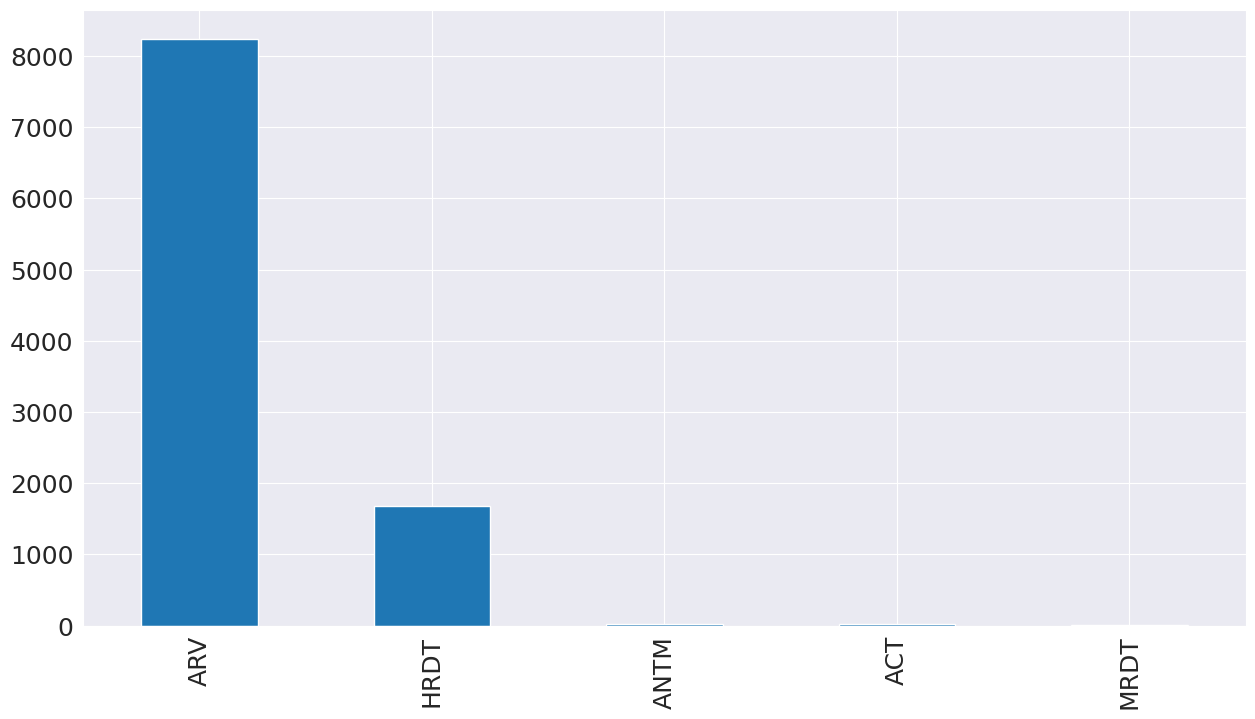

In [31]:
df["Product Group"].value_counts().plot(kind='bar')

<AxesSubplot:>

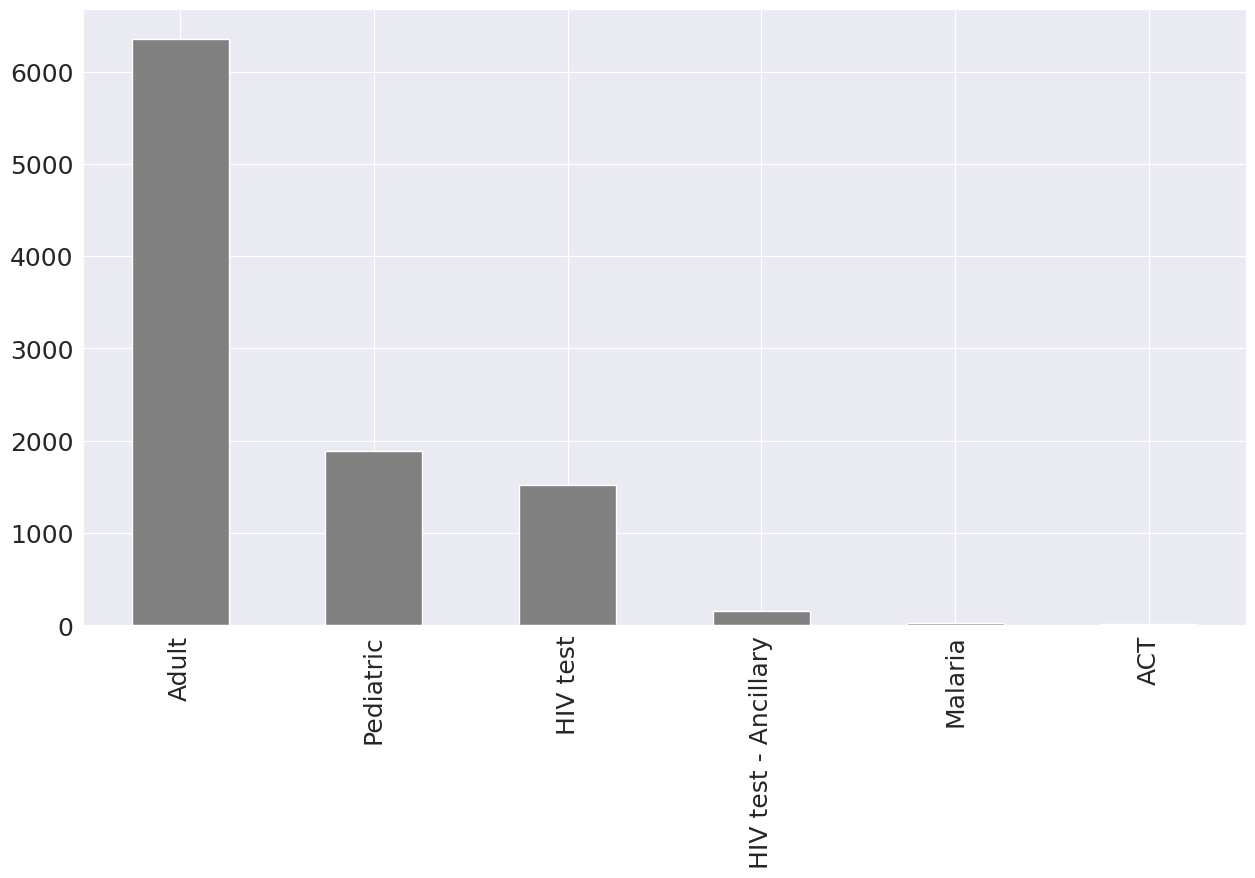

In [32]:
df["Sub Classification"].value_counts().plot(kind="bar", color ='grey')

Text(0.5, 0, 'Country Name')

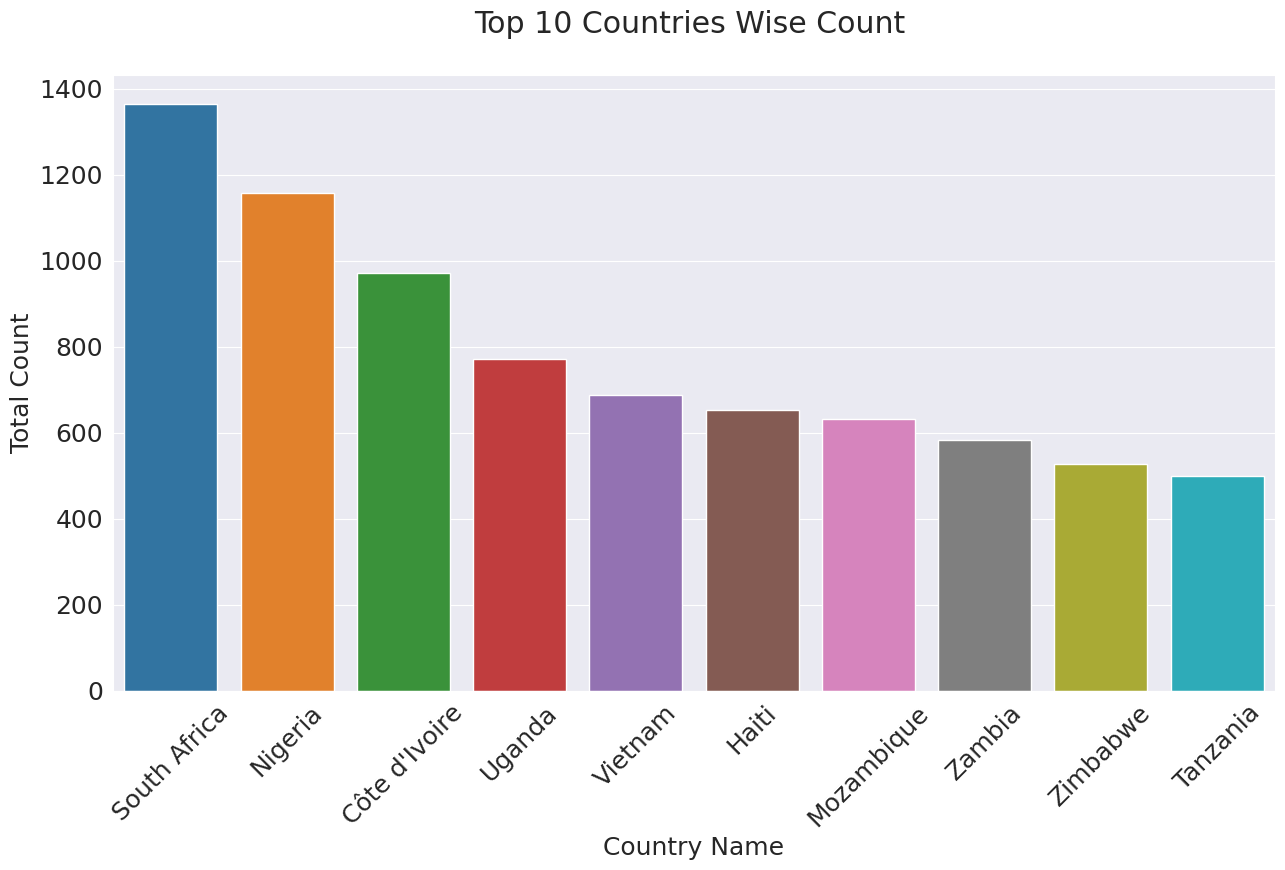

In [33]:
sns.countplot(df,x ='Country',
              order = df['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.xticks(rotation = 45)
plt.ylabel('Total Count')
plt.xlabel('Country Name')

Text(0.5, 0, 'Country Name')

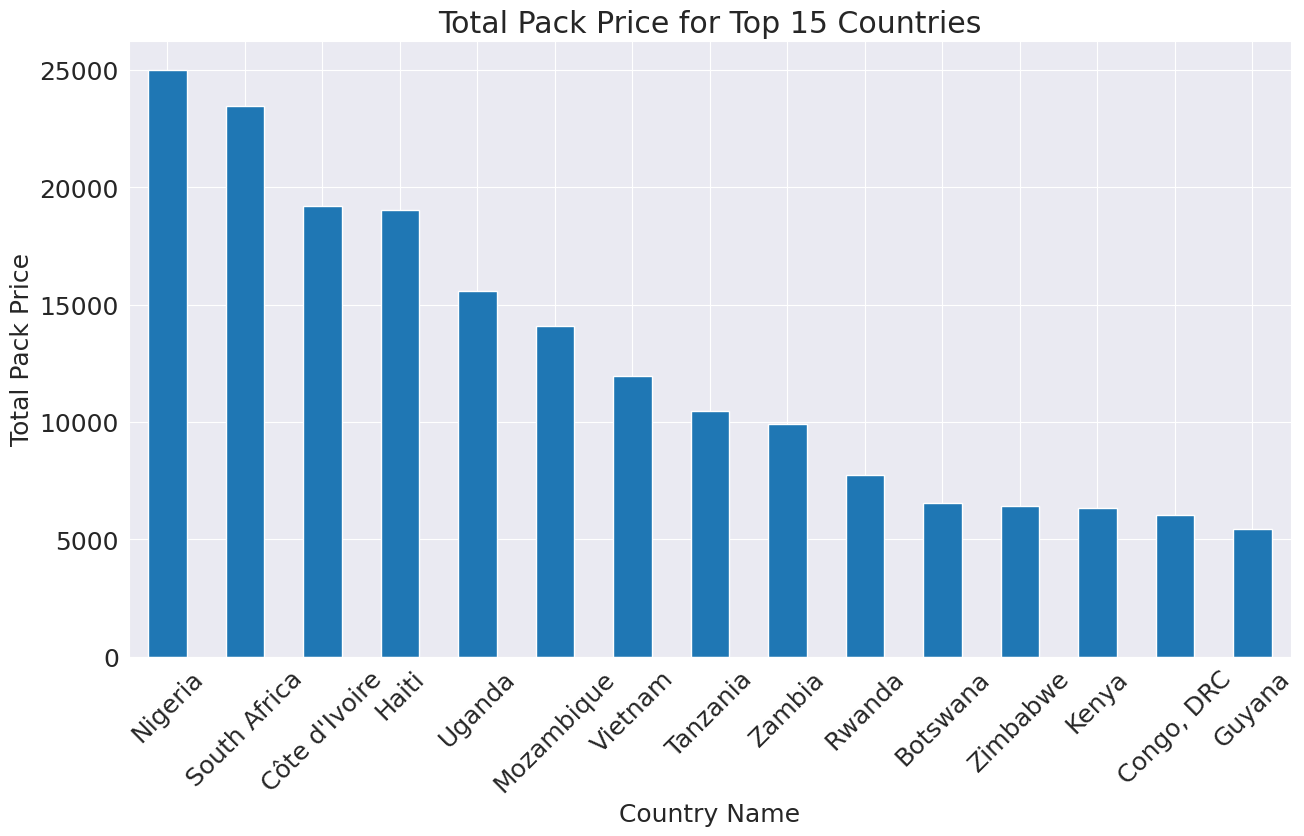

In [34]:
df.groupby(['Country'])['Pack Price'].sum().nlargest(15).plot(kind='bar')
plt.title("Total Pack Price for Top 15 Countries")
plt.xticks(rotation = 45)
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

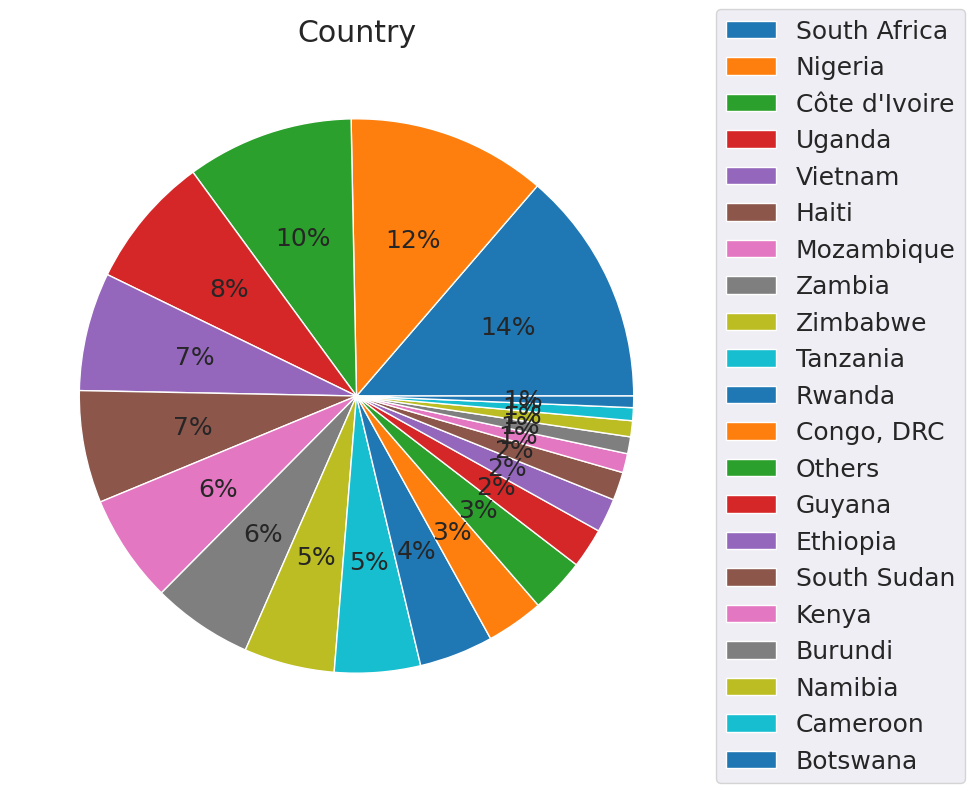

In [35]:
counts = df['Country'].value_counts()
idx = counts[counts.lt(60)].index
df.loc[df['Country'].isin(idx), 'Country'] = 'Others'
df["Country"].value_counts().plot.pie(label='',title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

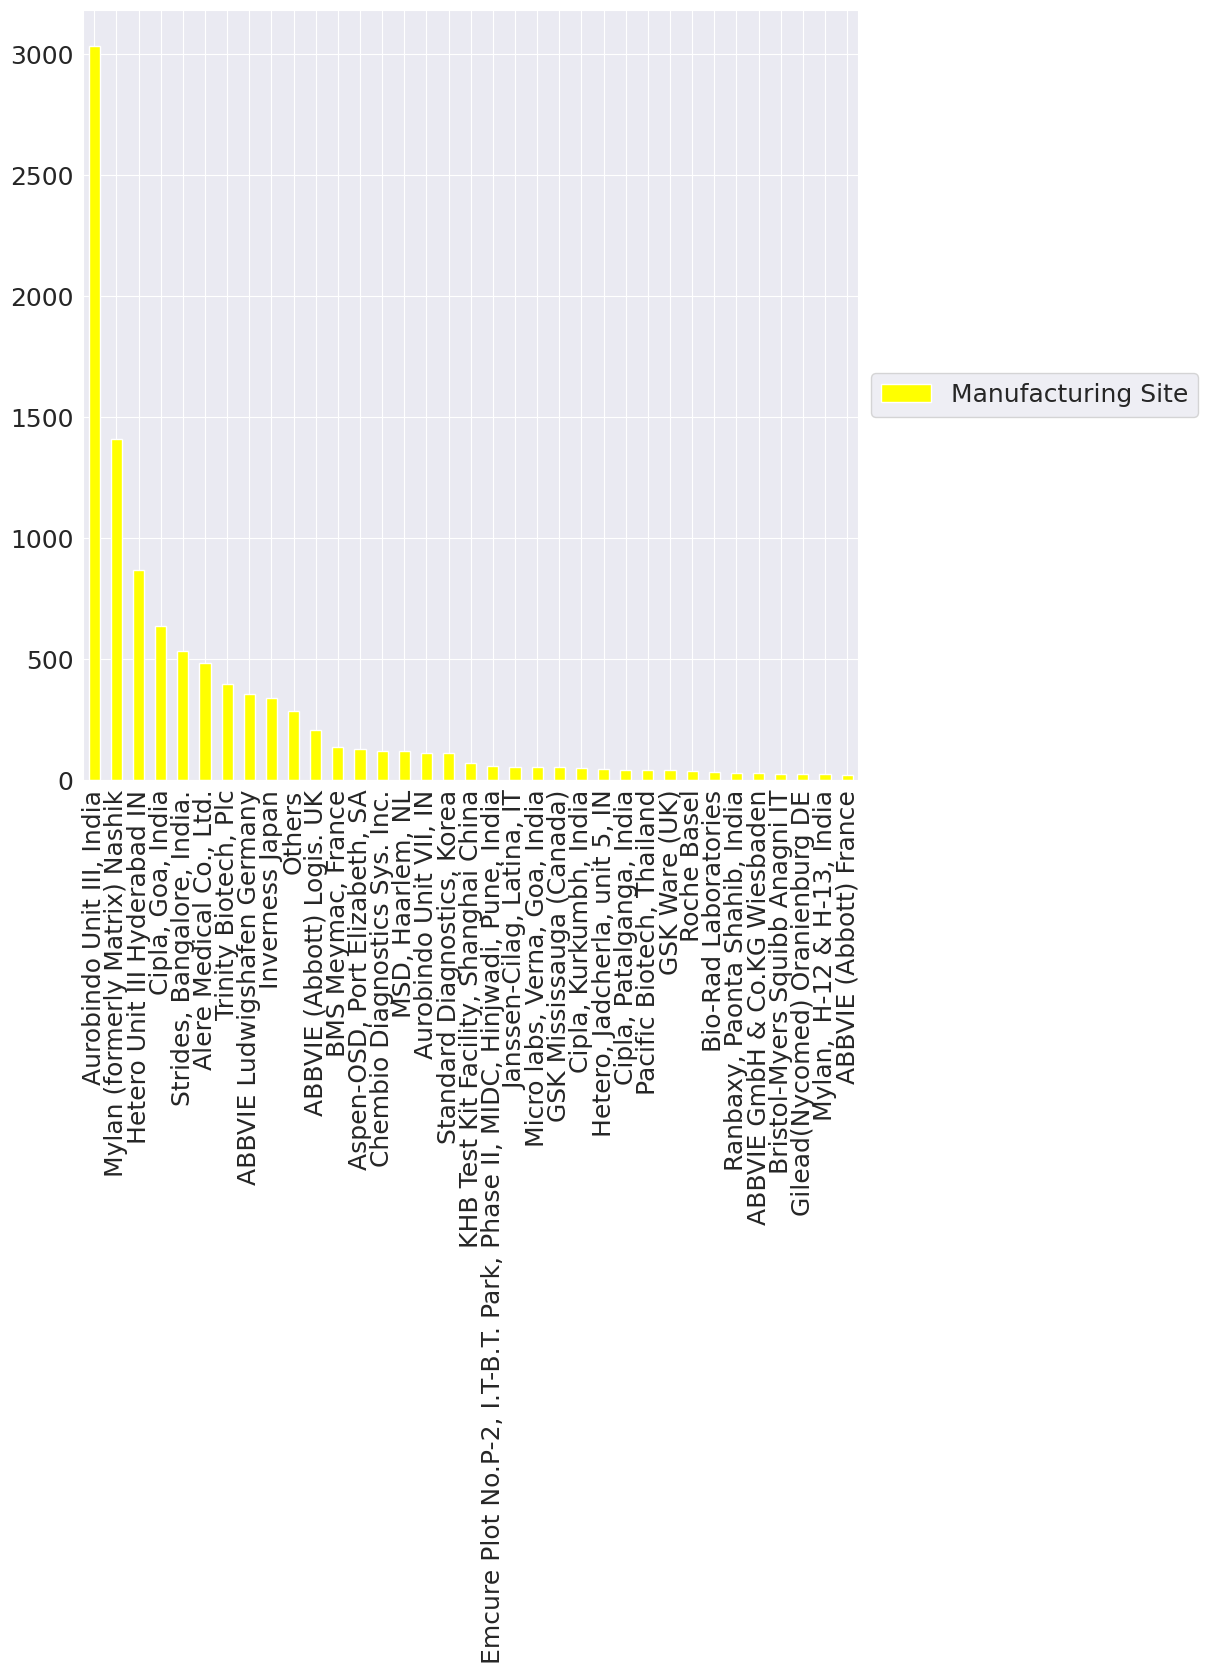

In [36]:
counts = df['Manufacturing Site'].value_counts()
idx = counts[counts.lt(20)].index
df.loc[df['Manufacturing Site'].isin(idx), 'Manufacturing Site'] = 'Others'
df["Manufacturing Site"].value_counts().plot(kind="bar",figsize=(10,10),color ='yellow')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

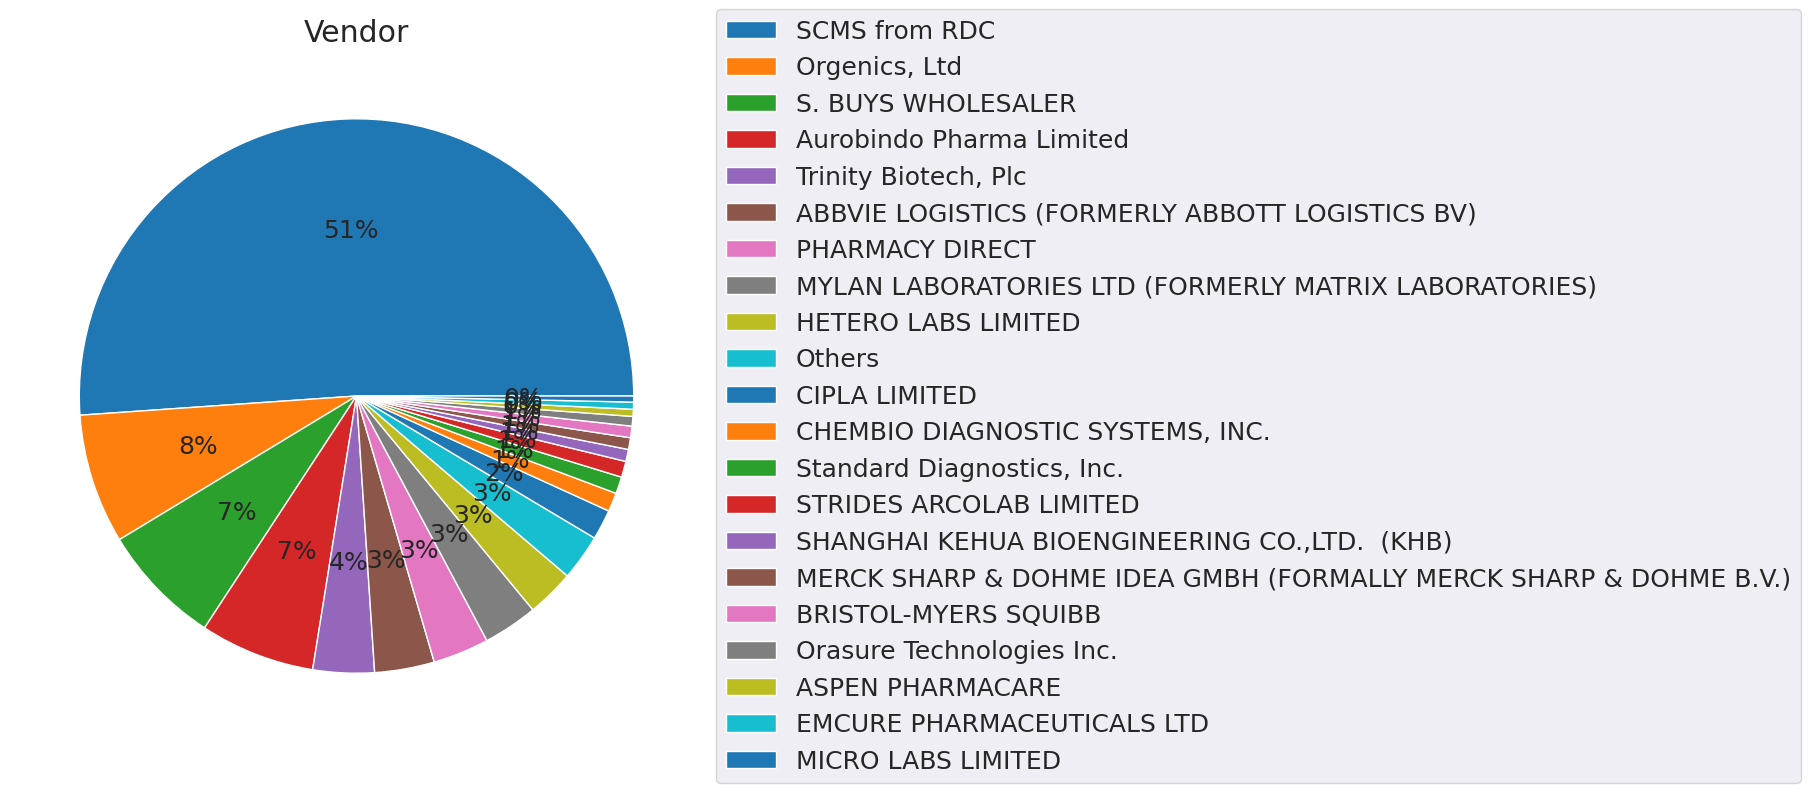

In [37]:
counts = df['Vendor'].value_counts()
idx = counts[counts.lt(30)].index
df.loc[df['Vendor'].isin(idx), 'Vendor'] = 'Others'
df["Vendor"].value_counts().plot.pie(label='',title="Vendor",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Text(0.5, 0, 'First Line Designation')

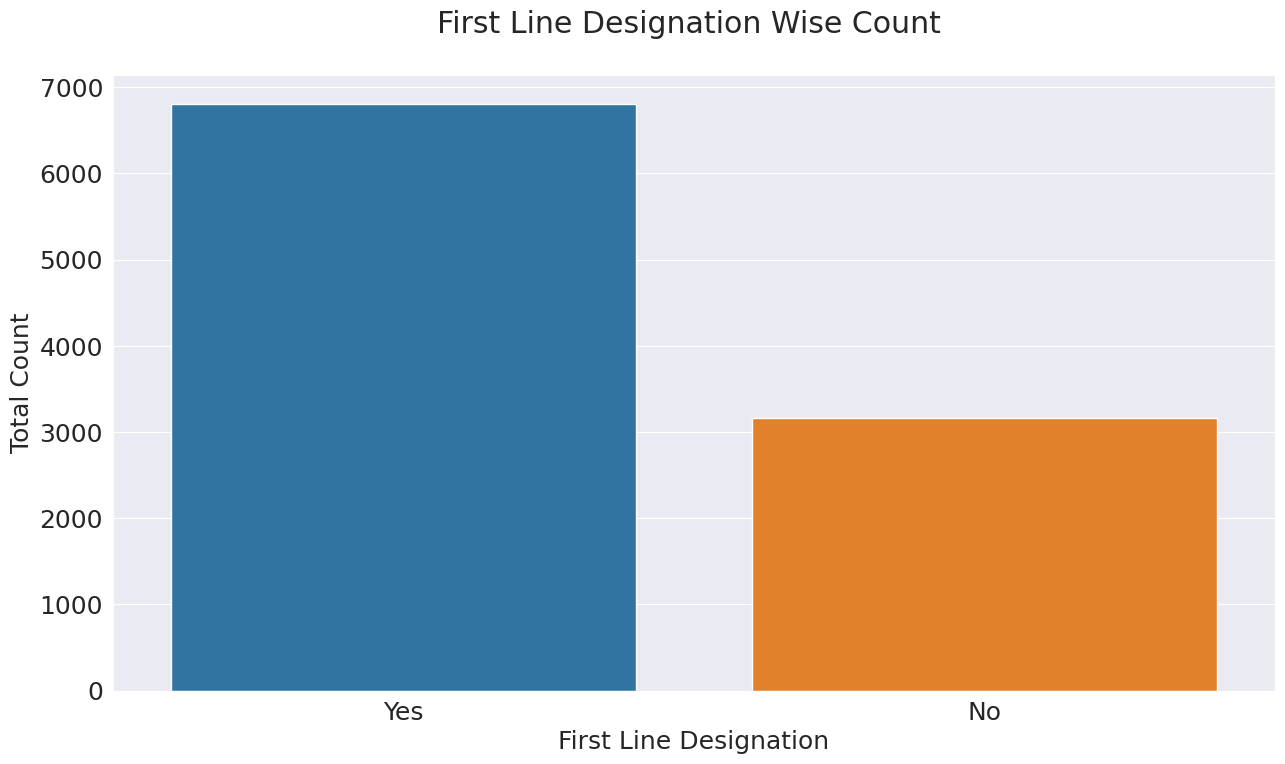

In [38]:
sns.countplot(df,x ="First Line Designation",order = df['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [39]:
print("The sum of Generic Unit Price total is ", df[df['Brand']=='Generic']['Unit Price'].sum())
px.bar(df.groupby('Brand')['Unit Price'].count().sort_values(ascending=False), title='Count of Unit Prices wrt Brands')

The sum of Generic Unit Price total is  1241.2


In [40]:
px.bar(df.groupby('Brand')['Unit Price'].sum().sort_values(ascending = False), title='Sum of Unit Prices wrt Brands',color_discrete_sequence =['red']*3)

In [41]:
px.bar(df.groupby('Country')['Unit Price'].sum()/df.groupby('Country')['Unit Price'].count(), 
       title='Ratio of Sum to Count of Unit Prices wrt Country')

In [42]:
px.bar(df.groupby('Dosage Form')['Pack Price'].sum().sort_values(ascending = False), title='Sum of Pack Prices wrt Vendor',color_discrete_sequence =['black']*3)

In [43]:
ShippingMode = df["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Manufacturing Site
Aurobindo Unit III, India         3031
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  634
Strides, Bangalore, India.         533
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               395
ABBVIE Ludwigshafen Germany        354
Inverness Japan                    337
Others                             282
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

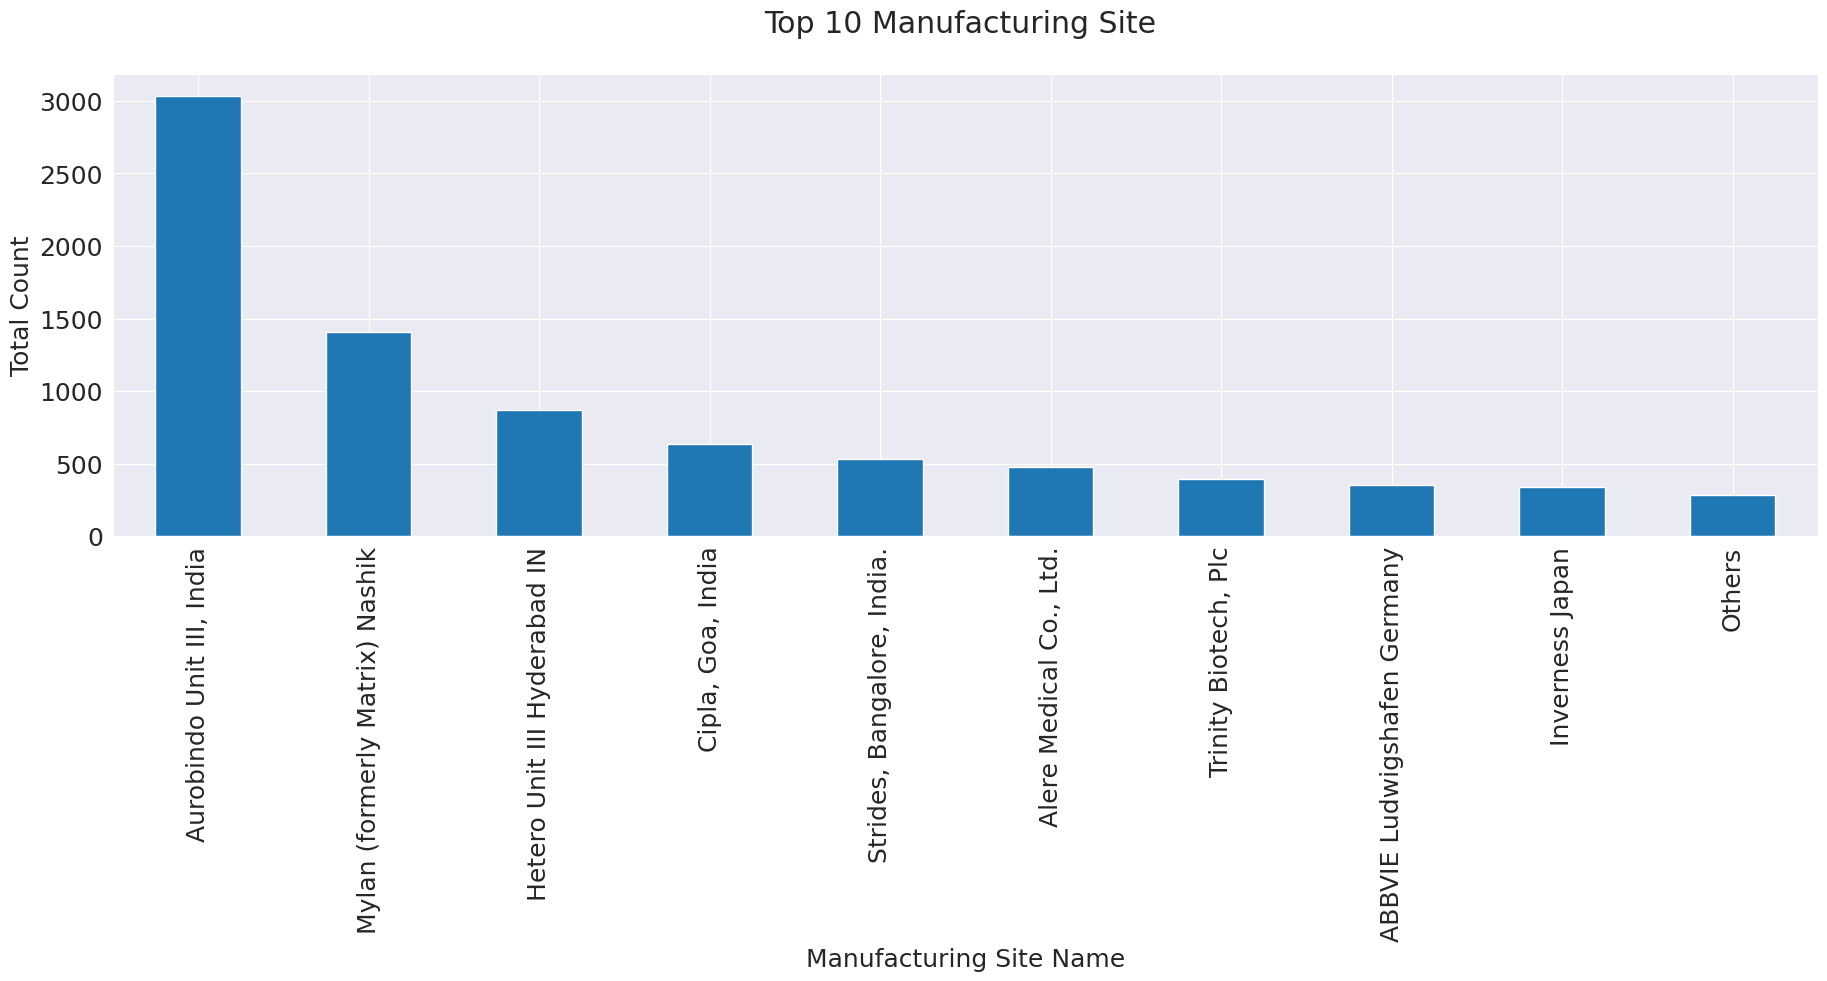

In [44]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1694
Mylan (formerly Matrix) Nashik     695
Alere Medical Co., Ltd.            473
Hetero Unit III Hyderabad IN       417
Trinity Biotech, Plc               383
Inverness Japan                    320
ABBVIE Ludwigshafen Germany        285
Cipla, Goa, India                  274
Strides, Bangalore, India.         256
Others                             182
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

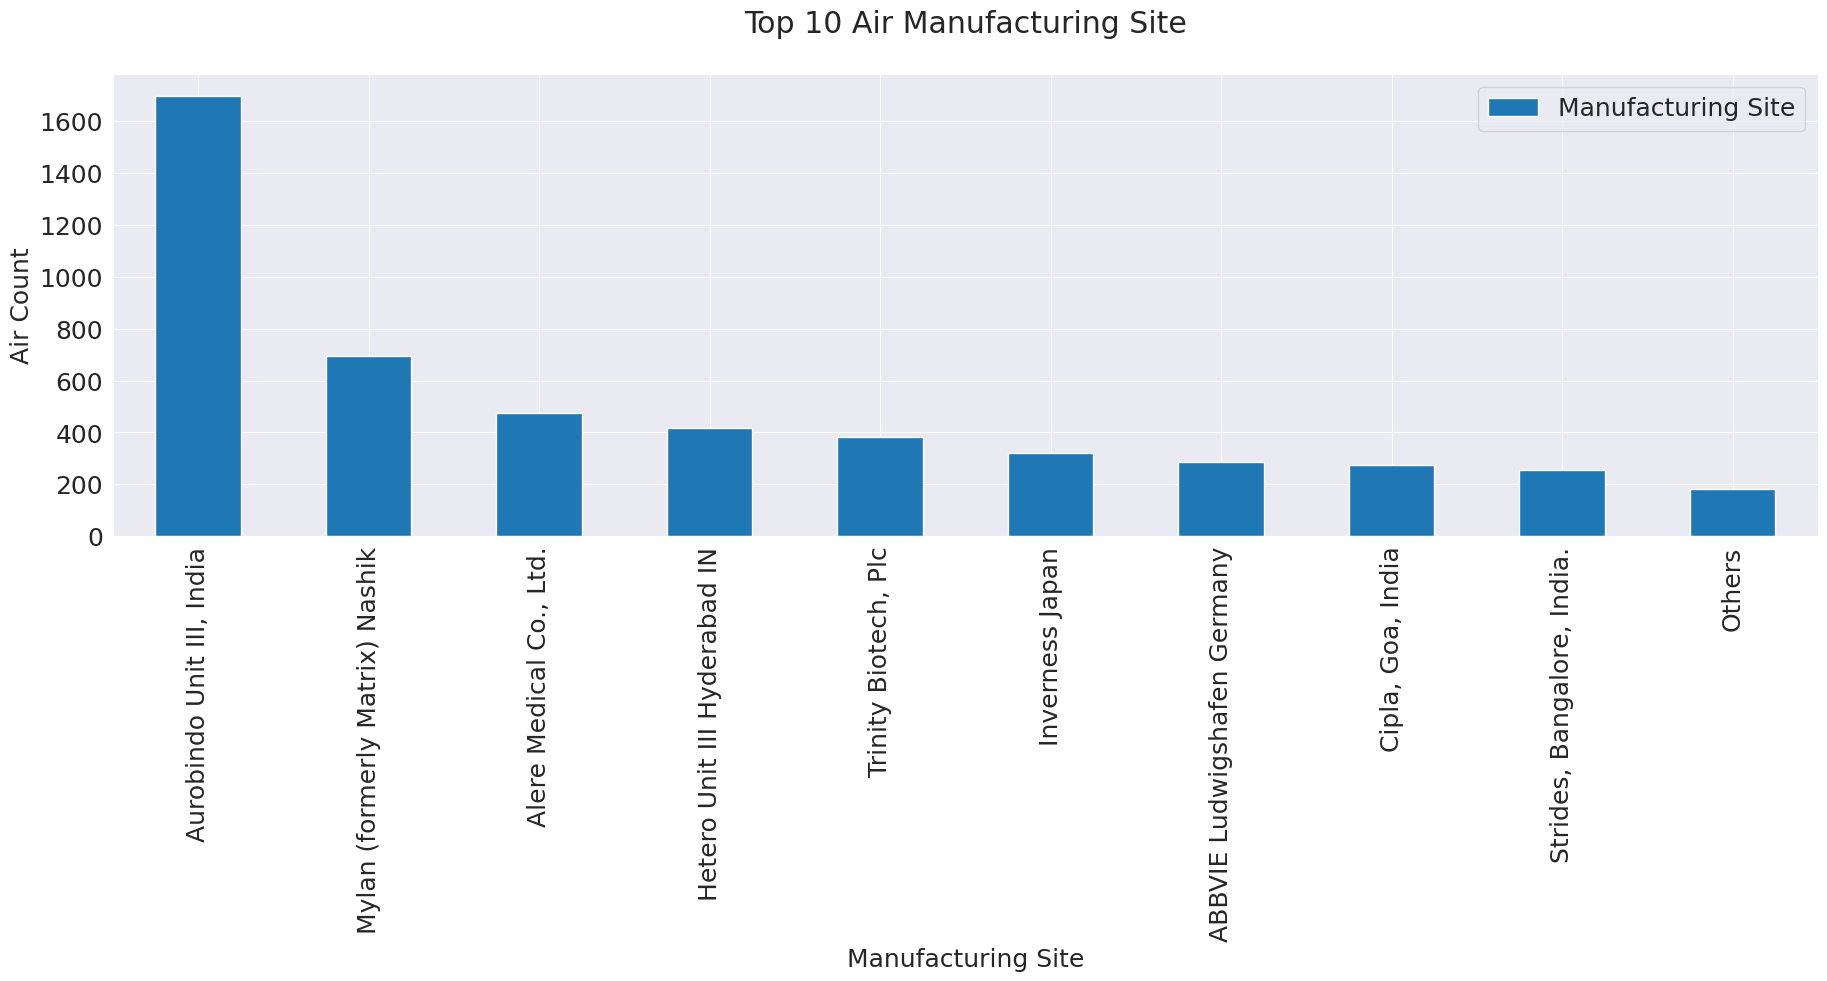

In [45]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData=df[df['Shipment Mode']=='Air']
df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = df[df["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

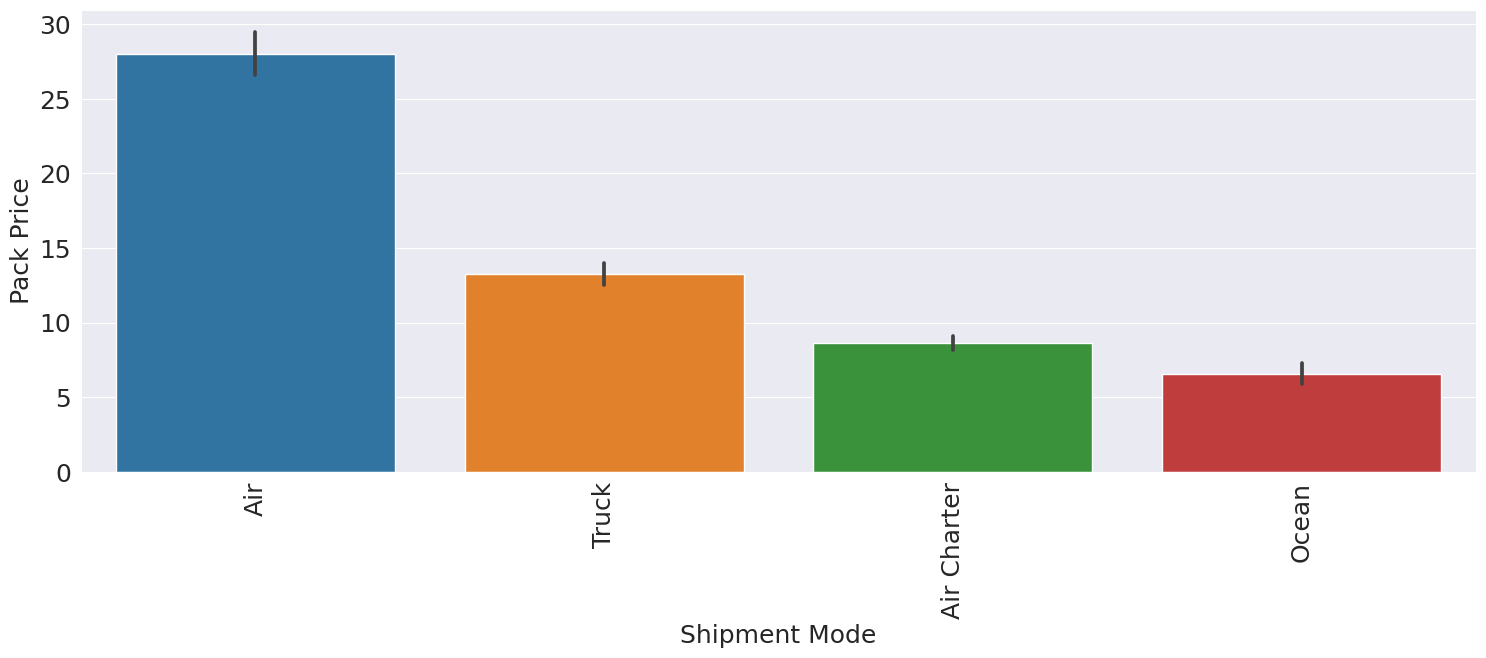

In [46]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot(x='Shipment Mode',y= 'Pack Price', data = df)
plt.show()

Description of ID
----------------------------------------------------------------------------
count     9964.000000
mean     52559.188679
std      31558.205236
min          1.000000
25%      15810.750000
50%      61097.500000
75%      83766.250000
max      86823.000000
Name: ID, dtype: float64

 Skewness of ID
----------------------------------------------------------------------------
-0.3096

 Histogram and Boxplot of ID
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


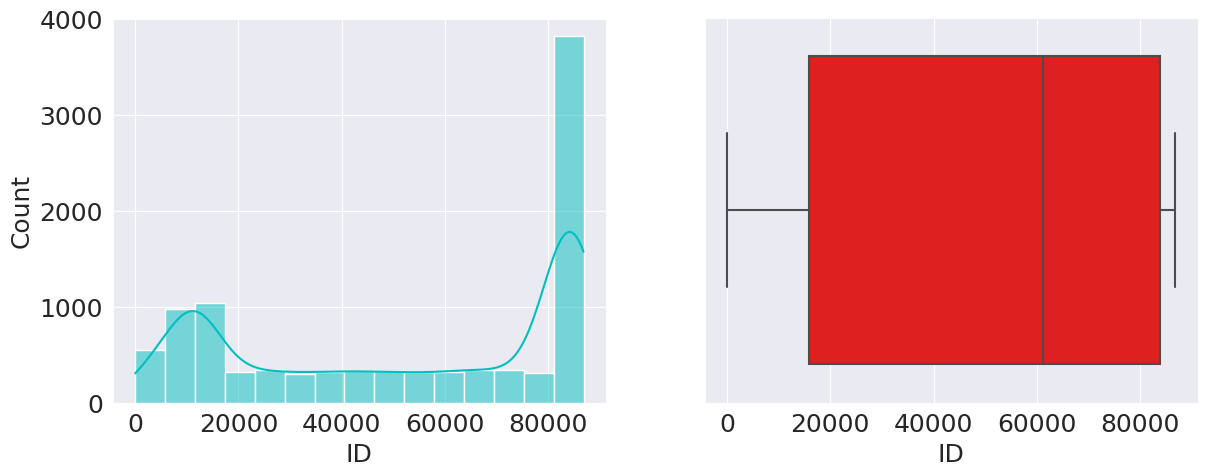

None
Description of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
count    9964.000000
mean       77.425733
std        76.393988
min         1.000000
25%        30.000000
50%        60.000000
75%        90.000000
max      1000.000000
Name: Unit of Measure (Per Pack), dtype: float64

 Skewness of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
4.4294

 Histogram and Boxplot of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


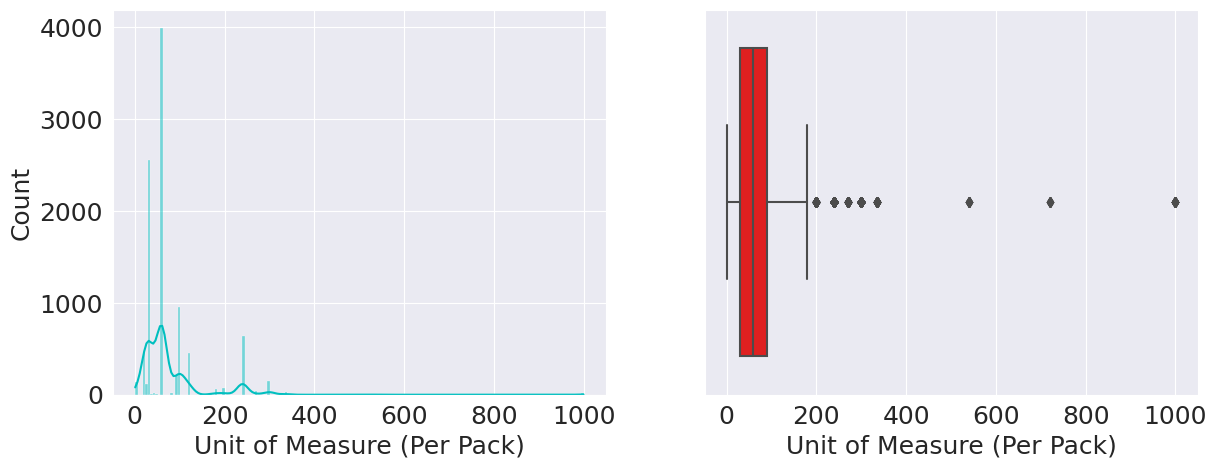

None
Description of Line Item Quantity
----------------------------------------------------------------------------
count      9964.000000
mean      18612.925632
std       40572.830601
min           1.000000
25%         405.000000
50%        3035.000000
75%       17441.750000
max      619999.000000
Name: Line Item Quantity, dtype: float64

 Skewness of Line Item Quantity
----------------------------------------------------------------------------
4.9919

 Histogram and Boxplot of Line Item Quantity
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


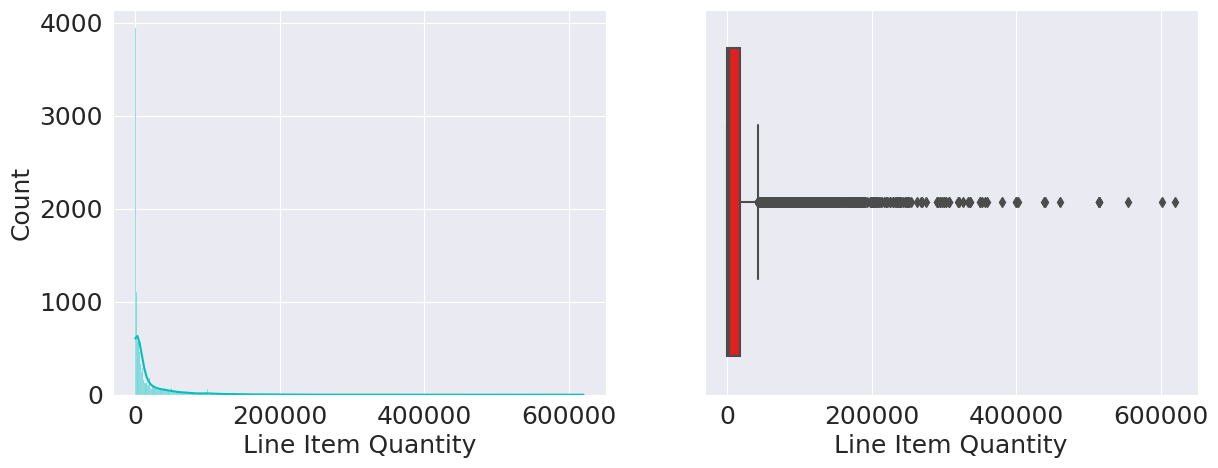

None
Description of Line Item Value
----------------------------------------------------------------------------
count    9.964000e+03
mean     1.592953e+05
std      3.493419e+05
min      0.000000e+00
25%      4.272032e+03
50%      3.042884e+04
75%      1.686673e+05
max      5.951990e+06
Name: Line Item Value, dtype: float64

 Skewness of Line Item Value
----------------------------------------------------------------------------
5.8105

 Histogram and Boxplot of Line Item Value
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


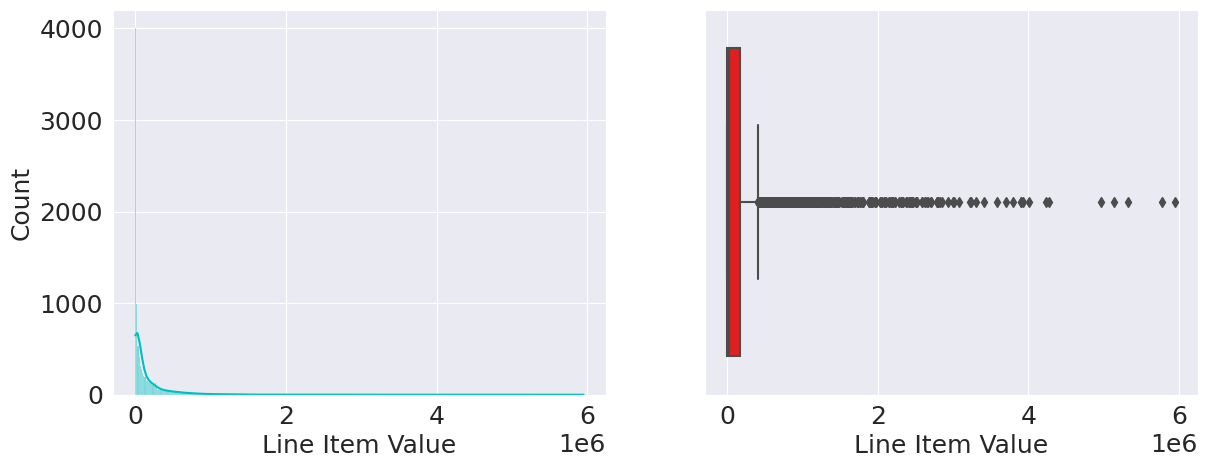

None
Description of Pack Price
----------------------------------------------------------------------------
count    9964.000000
mean       21.734272
std        45.710003
min         0.000000
25%         4.120000
50%         8.970000
75%        23.260000
max      1345.640000
Name: Pack Price, dtype: float64

 Skewness of Pack Price
----------------------------------------------------------------------------
13.2143

 Histogram and Boxplot of Pack Price
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


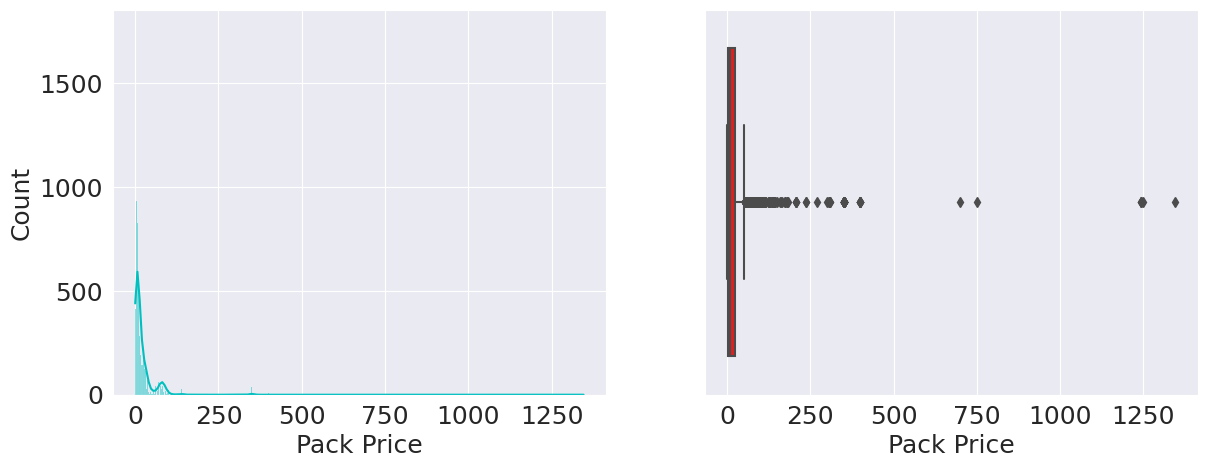

None
Description of Unit Price
----------------------------------------------------------------------------
count    9964.000000
mean        0.590277
std         2.292690
min         0.000000
25%         0.080000
50%         0.160000
75%         0.460000
max        41.680000
Name: Unit Price, dtype: float64

 Skewness of Unit Price
----------------------------------------------------------------------------
9.8741

 Histogram and Boxplot of Unit Price
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


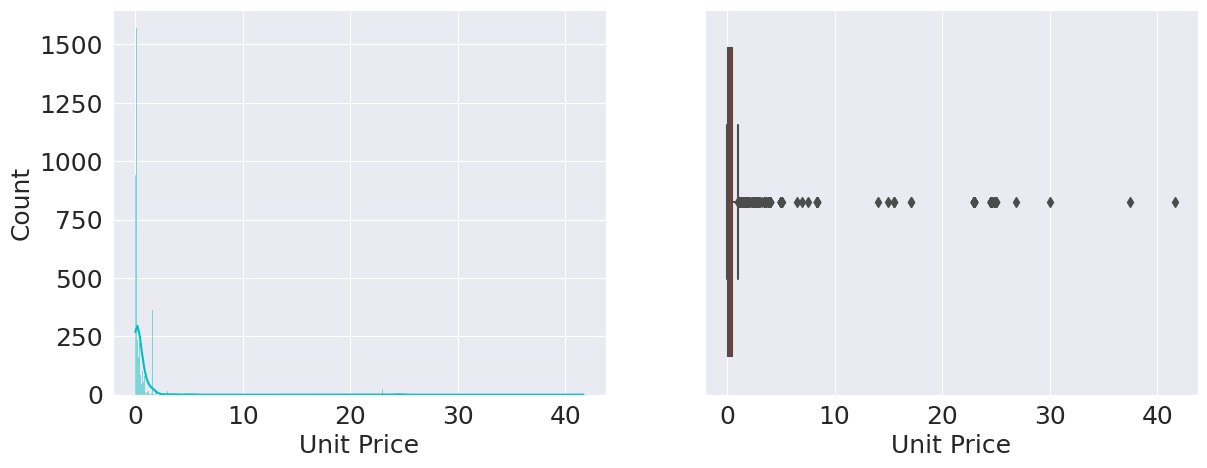

None
Description of Weight (Kilograms)
----------------------------------------------------------------------------
count      9964.000000
mean       4508.207782
std       12434.774299
min           0.000000
25%         404.000000
50%        2156.000000
75%        4464.293407
max      857354.000000
Name: Weight (Kilograms), dtype: float64

 Skewness of Weight (Kilograms)
----------------------------------------------------------------------------
35.8107

 Histogram and Boxplot of Weight (Kilograms)
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


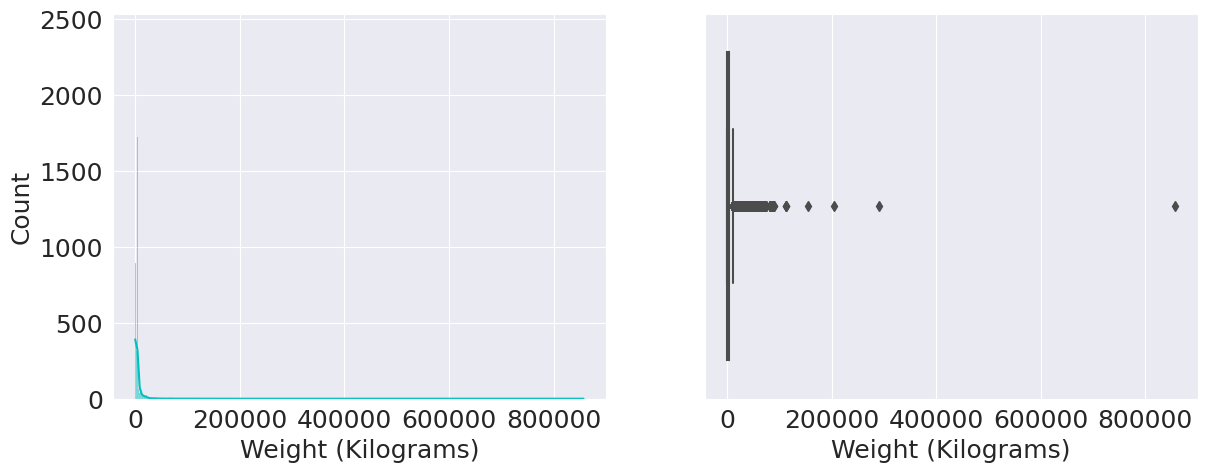

None
Description of Freight Cost (USD)
----------------------------------------------------------------------------
count      9964.000000
mean      10897.637729
std       17130.306717
min           0.000000
25%        1374.732500
50%        5530.110000
75%       13290.310000
max      289653.200000
Name: Freight Cost (USD), dtype: float64

 Skewness of Freight Cost (USD)
----------------------------------------------------------------------------
4.4537

 Histogram and Boxplot of Freight Cost (USD)
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


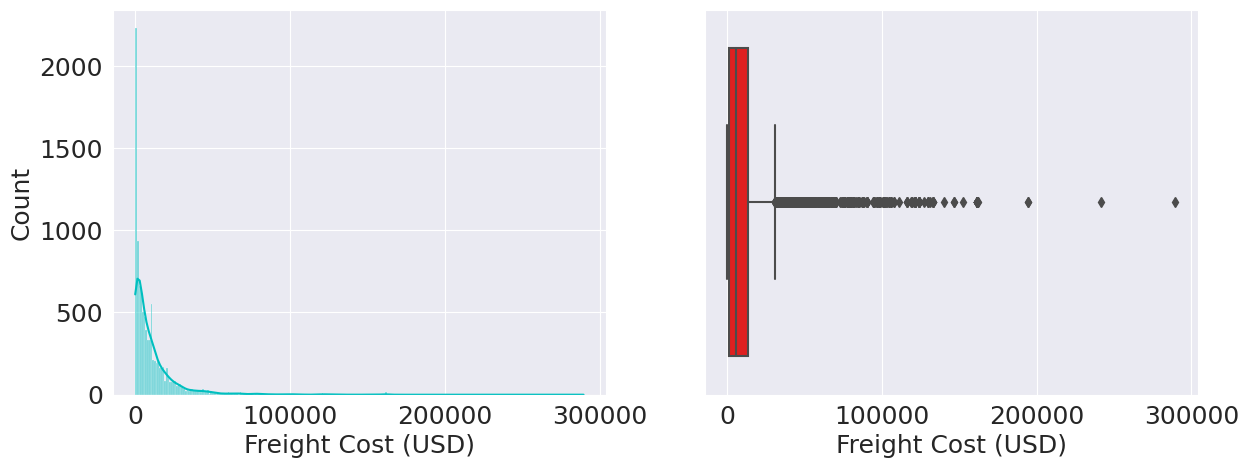

None
Description of Line Item Insurance (USD)
----------------------------------------------------------------------------
count    9964.000000
mean      239.313809
std       500.186015
min         0.000000
25%         6.530000
50%        46.960000
75%       251.730000
max      7708.440000
Name: Line Item Insurance (USD), dtype: float64

 Skewness of Line Item Insurance (USD)
----------------------------------------------------------------------------
4.8511

 Histogram and Boxplot of Line Item Insurance (USD)
----------------------------------------------------------------------------
AxesSubplot(0.125,0.11;0.352273x0.77)
AxesSubplot(0.547727,0.11;0.352273x0.77)


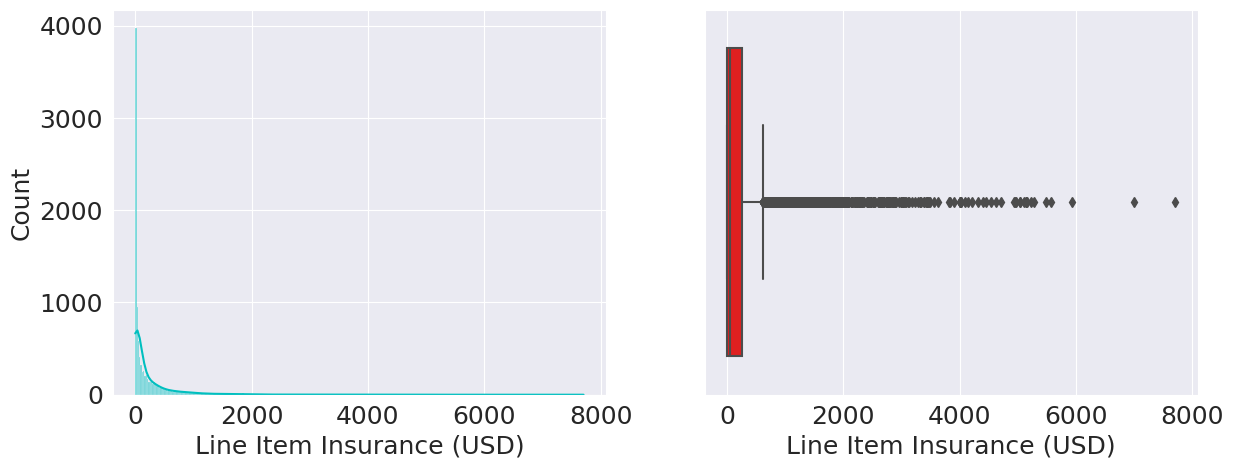

None


In [47]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

for column in df.columns:
    if (df[column].dtype != 'object')and(df[column].dtype != 'datetime64[ns]'):
        print(univariateAnalysis_numeric(column,60))